<a href="https://colab.research.google.com/github/Kimery/Python/blob/master/MovieDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Movie Database

In [2]:
import requests

api_key = '21010dcd0038c0beff30b80e21e98c4c'

#---- REQUEST 1: Search a movie -----

parameters = {"api_key":api_key,
              "query":'Aquaman',
              "language":'en-US',              
              "include_adult":'false'}


#Take a look of the parameters detail at "Send request" section
response = requests.get('https://api.themoviedb.org/3/search/movie',params=parameters)
result = response.text  #Type= String

#Check url structure
#print(response.url)

#Check the availability of requests
if (int(response.headers["x-ratelimit-remaining"])) > 0:
 data = response.json() #It´s easier convert as json

 #Data structure: {'page', 'total_results', 'total_pages', 'results'}
 #print(data)

 if data['total_results']>0:  
  print('Total pages: '+ str(data['total_pages']))
  print('Total results: '+ str(data['total_results']))  
  for i in data['results']:
   print('Movie: '+i['original_title']+' Popularity: '+str(i['popularity']) +' Overview: '+i['overview'])    
 else:
  print('The movie doesn´t exist')



Total pages: 1
Total results: 6
Movie: Aquaman Popularity: 241.298 Overview: Once home to the most advanced civilization on Earth, the city of Atlantis is now an underwater kingdom ruled by the power-hungry King Orm. With a vast army at his disposal, Orm plans to conquer the remaining oceanic people -- and then the surface world. Standing in his way is Aquaman, Orm's half-human, half-Atlantean brother and true heir to the throne. With help from royal counselor Vulko, Aquaman must retrieve the legendary Trident of Atlan and embrace his destiny as protector of the deep.
Movie: Aquaman Popularity: 6.355 Overview: A young twenty-something diver living in the Florida Keys discovers he has the power to breathe underwater.
Movie: Aquaman 2 Popularity: 5.807 Overview: A sequel to the Aquaman (2018).
Movie: LEGO DC Super Heroes - Aquaman: Rage Of Atlantis Popularity: 8.42 Overview: Aquaman must battle foes in the air, on land and in the depths of the Seven Seas, along with some help from The Ju

https://api.themoviedb.org/3/discover/movie?api_key=21010dcd0038c0beff30b80e21e98c4c&language=en-US&year=1984&sort_by=popularity.desc
MORE POPULAR MOVIE
Movie :The Terminator - Popularity: 29.296


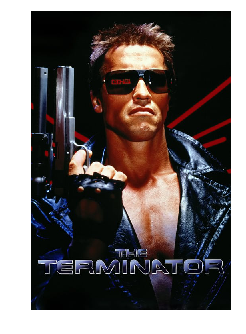

In [5]:
#SEARCH THE MOVIE WITH MORE POPULARITY IN 1984
import urllib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

parameters = {"api_key":api_key,              
              "language":'en-US',
              "year":1984, 
              "sort_by" :'popularity.desc'
              }

response = requests.get('https://api.themoviedb.org/3/discover/movie',params=parameters)
result = response.text

print(response.url)


#Check the availability of requests
if (int(response.headers["x-ratelimit-remaining"])) > 0:
 data = response.json()
 popular_movie_data = data['results'][0] 
 print('MORE POPULAR MOVIE')
 print('Movie :' + popular_movie_data['title'] + ' - Popularity: '+ str(popular_movie_data['popularity']))
 im = Image.open(urllib.request.urlopen("https://image.tmdb.org/t/p/w500/"+popular_movie_data['poster_path']))
 plt.imshow(np.asarray(im))
 plt.axis('off')
 plt.show()




In [23]:
#MOVIE GENRES

parameters = {"api_key":api_key,              
              "language":'en-US'              
              }

response = requests.get('https://api.themoviedb.org/3/discover/movie',params=parameters)
result = response.text


#Check the availability of requests
if (int(response.headers["x-ratelimit-remaining"])) > 0:
 data = response.json()
 dicc_film_genre={}

 #Load the dictionary (Film, #Genres)
 for film in data['results']:
  title= film['title']
  count_g = len(film['genre_ids'])
  dicc_film_genre[title]=count_g

#Sort the dictionary by value   
print(sorted(dicc_film_genre.items(), key=lambda kv: kv[1],reverse=True))



https://api.themoviedb.org/3/discover/movie?api_key=21010dcd0038c0beff30b80e21e98c4c&language=en-US&sort_by=rating.desc
[('Mord am Meer', 4), ('Kung Fu Hustle', 4), ('Vampire Hunter D', 3), ('Hudson Hawk', 3), ("Charlie's Angels: Full Throttle", 3), ('Transsiberian', 3), ('Enter the Dragon', 2), ('The Way of the Dragon', 2), ('Auf Wiedersehen, Franziska!', 2), ('Gegenschuss - Aufbruch der Filmemacher', 1), ('Sohn ohne Heimat', 1), ('Die blonde Christl', 1), ('Der kühne Schwimmer', 1), ('Der Etappenhase', 1), ('Zwei Bayern im Harem', 1), ('The Mugger', 1), ('Margarete Steiff', 1), ('He Got Game', 1), ('Bottoms Up', 1), ('Der Edelweißkönig', 1)]


In [4]:
#SEARCH INFO ABOUT AN ACTOR

import urllib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

parameters = {"api_key":api_key,
              "language":'en-US'              
              }

#jason-momoa
actor_id= '117642' 

response = requests.get('https://api.themoviedb.org/3/person/'+actor_id,params=parameters)
result = response.text

if (int(response.headers["x-ratelimit-remaining"])) > 0:
 data = response.json()
 print( 'Actor name:'+ data['name'])  
 print( 'Actor birthday:'+ data['birthday'])  
 print('Place of birth:'+ data['place_of_birth'])   
 



Actor name:Jason Momoa
Actor birthday:1979-08-01
Place of birth:Honolulu, Hawaii, USA
